In [498]:
import pandas as pd
import spacy
import steamreviews
import json
import csv
import os
import glob
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import re
import plotly
import seaborn as sns
import stanza

## Reviews download
https://pypi.org/project/steamreviews/

In [499]:
dir_name = "data"
reviews_jsons = glob.glob(f"{dir_name}/*")
reviews_jsons

['data\\review_1150690.json',
 'data\\review_1172620.json',
 'data\\review_1341290.json',
 'data\\review_1515210.json',
 'data\\review_210970.json',
 'data\\review_219150.json',
 'data\\review_219890.json',
 'data\\review_250320.json',
 'data\\review_257510.json',
 'data\\review_262060.json',
 'data\\review_289070.json',
 'data\\review_294100.json',
 'data\\review_304430.json',
 'data\\review_394360.json',
 'data\\review_400.json',
 'data\\review_427520.json',
 'data\\review_460950.json',
 'data\\review_550.json',
 'data\\review_620.json',
 'data\\review_632470.json',
 'data\\review_646570.json',
 'data\\review_736260.json',
 'data\\review_860510.json']

In [500]:
title_dict = {"219150": "Hotline Miami",
              "1172620" : "Sea of Thieves",
              "460950" : "Katana ZERO",
              "262060" : "Darkest Dungeon",
              "250320" : "The Wolf Among Us",
              "210970" : "The Witness",
              "620" : "Portal 2",
              "736260" : "Baba Is You",
              "219890" : "Antichamber",
              "289070" : "Sid Meier's Civilization VI",
              "427520" : "Factorio",
              "257510" : "The Talos Principle",
             "304430" : "INSIDE",
             "400" : "Portal",
             "394360" : "Hearts of Iron IV",
             "632470" : "Disco Elysium",
             "294100" : "RimWorld",
              "646570" : "Slay the Spire",
              "1150690" : "Omori",
              "1341290" : "We Were Here Forever",
              "1515210" : "The Past Within",
              "860510" : "Little Nightmares II",
              "550" : "Left 4 Dead 2"}

In [501]:
genre_dict = {"219150": "A",
              "1172620" : "A",
              "460950" : "A",
              "262060" : "R",
              "250320" : "R",
              "210970" : "P",
              "620" : "P",
              "736260" : "P",
              "219890" : "P",
              "289070" : "S",
              "427520" : "S",
              "257510" : "P",
              "304430" : "P",
             "400" : "P",
             "394360" : "S",
             "632470" : "R",
             "294100" : "S",
             "646570" : "R",
             "1150690" : "R",
             "1341290" : "P",
             "1515210" : "P",
             "860510" : "P",
             "550" : "A"}

In [502]:
data_list = []
for i in reviews_jsons:
    with open(i, encoding = "utf-8") as json_file:
        json_data = json.load(json_file)
        reviews = json_data['reviews']
        file_name = json_file.name.split('.')[0].split('_')[1]
        for key in reviews.keys():
            data_list.append([title_dict.get(file_name),genre_dict.get(file_name),reviews[key]['author']['steamid'], reviews[key]['votes_up'], 
                          reviews[key]['review'], reviews[key]['weighted_vote_score'], reviews[key]['voted_up'],
                          reviews[key]['author']['num_games_owned'], reviews[key]['author']['playtime_at_review'],
                          reviews[key]['author']['num_reviews'], 
                          reviews[key]["timestamp_created"] ])
df = pd.DataFrame(data_list, columns = ["title", "genre","steamid", "votes_up", "review", "weighted_vote_score", "voted_up",
                                        "num_games_owned", "playtime_at_review", "num_reviews", "timestamp_created"])

## Wykresy

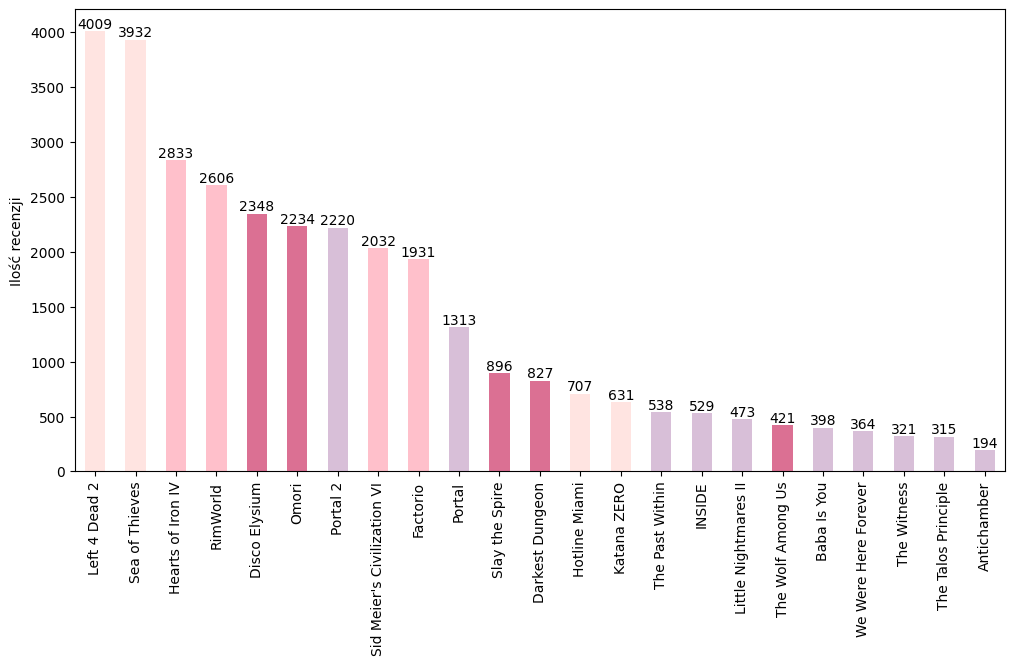

In [503]:
value_counts_title = df["title"].value_counts()
genre_colors = {"A": "mistyrose", "R": "palevioletred", "P": "thistle", "S": "pink"}
df['color'] = df['genre'].map(genre_colors)
colors = [df.loc[df['title'] == title]['color'].iloc[0] for title in value_counts_title.index]

plt.figure(figsize=(12, 6))
x = value_counts_title.plot(kind = "bar", color = colors)
plt.ylabel("Ilość recenzji")
plt.xticks(rotation = 90)
for i, count in enumerate(value_counts_title):
    x.text(i, count, count, va = "bottom", ha = "center")

plt.show()

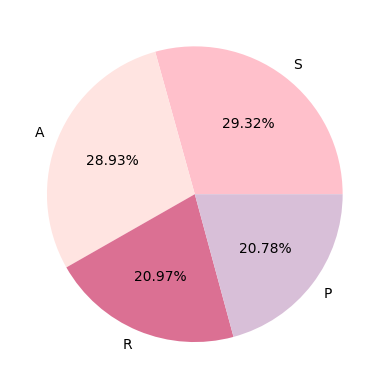

In [504]:
value_counts_genre = df["genre"].value_counts()
colors = ["pink", "mistyrose", "palevioletred", "thistle"]
x = plt.pie(value_counts_genre, labels = value_counts_genre.index, colors=colors, autopct='%1.2f%%')
plt.show()

<Figure size 1200x600 with 0 Axes>

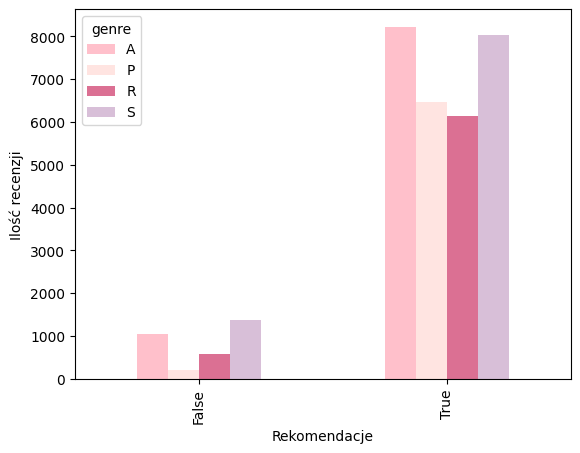

In [505]:
value_counts_recommendation_genre = df.groupby('genre').voted_up.value_counts().unstack(0)
colors = ["pink", "mistyrose", "palevioletred", "thistle"]
plt.figure(figsize=(12, 6))
x = value_counts_recommendation_genre.plot(kind = "bar", color = colors, mark_right = True)
plt.ylabel("Ilość recenzji")
plt.xlabel("Rekomendacje")
plt.show()

In [506]:
percentage_pos = value_counts_recommendation_genre.iloc[1] / (value_counts_recommendation_genre.iloc[1] + value_counts_recommendation_genre.iloc[0]) * 100 
percentage_neg = value_counts_recommendation_genre.iloc[0] / (value_counts_recommendation_genre.iloc[0] + value_counts_recommendation_genre.iloc[1]) * 100 
print(percentage_pos)
print(percentage_neg)

genre
A    88.619463
P    96.954239
R    91.465953
S    85.354180
dtype: float64
genre
A    11.380537
P     3.045761
R     8.534047
S    14.645820
dtype: float64


In [507]:
df.sample(frac=0.3).head()

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color
6167,We Were Here Forever,P,76561198147139799,75,10/10 reminded me of how absolutely brainless ...,0.864344596862792969,True,144,1012,21,1672714335,thistle
7039,The Past Within,P,76561198213680447,2,Good game. Great atmosphere. Creative puzzles ...,0.545913219451904297,True,0,141,47,1707009136,thistle
26502,Portal 2,P,76561199498052689,1,Id recommend you play the first game first of ...,0.523809552192687988,True,0,440,5,1683072480,thistle
31852,Little Nightmares II,P,76561198056231832,1,Excellent sequel to a great game that raises t...,0.52173912525177002,True,229,539,65,1671202444,thistle
23138,Left 4 Dead 2,A,76561199043743339,1,that was gooooood playing to fun\n,0.523809552192687988,True,16,3473,2,1683115463,mistyrose


In [508]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

## Preprocessing

1. Braki danych
2. Usunięcie duplikatów
4. Usunięcie recenzjii krótszych niż 3 słowa
9. Usunięcie znaków spcjalnych 
10. "Text lowering"
6. Usunięcie znaków interpunkcyjnych i liczb
7. Tokenizacja
8. Part-of-speech tagging
9. Lematyzacja

#### Braki danych

In [509]:
df.isna().sum()

title                  0
genre                  0
steamid                0
votes_up               0
review                 0
weighted_vote_score    0
voted_up               0
num_games_owned        0
playtime_at_review     0
num_reviews            0
timestamp_created      0
color                  0
dtype: int64

#### Usunięcie duplikatów

In [510]:
df.duplicated(subset='review').sum()

2580

In [511]:
df[df.duplicated(subset='review')].sample(59)

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color
25342,Left 4 Dead 2,A,76561198808344877,1,Coach,0.509803950786590576,True,55,41,8,2022-11-27 15:39:19,mistyrose
27639,Portal 2,P,76561198411598354,1,good game,0.517241418361663818,True,251,628,24,2022-11-20 18:03:48,thistle
12569,RimWorld,S,76561198127098081,1,war crimes,0.523809552192687988,True,164,97889,3,2023-08-27 18:04:06,pink
4952,Sea of Thieves,A,76561199184295580,2,h,0.52173912525177002,True,0,550,13,2023-02-08 03:10:04,mistyrose
2868,Sea of Thieves,A,76561199025081579,2,pirate,0.536082446575164795,True,17,32100,7,2022-11-21 03:50:59,mistyrose
3005,Sea of Thieves,A,76561199223547068,2,e,0.527272701263427734,True,0,220,8,2023-04-29 12:15:29,mistyrose
24174,Left 4 Dead 2,A,76561198894610454,1,"I am a 45 yo father, probably one of the oldes...",0.523809552192687988,True,0,1793,2,2022-12-04 11:39:27,mistyrose
7598,Hotline Miami,A,76561199242836550,1,fun,0.523809552192687988,True,0,319,2,2023-08-01 00:28:24,mistyrose
13465,RimWorld,S,76561198260279099,1,Yes,0.523809552192687988,True,0,5219,27,2022-10-26 01:59:26,pink
17048,Hearts of Iron IV,S,76561199235545007,1,better than sex,0.512711822986602783,True,26,18409,1,2023-05-06 03:36:06,pink


In [512]:
(df.duplicated(subset='review') == False).sum()

29492

In [513]:
df = df[df.duplicated(subset='review') == False]

In [514]:
df.duplicated(subset='review').sum()

0

#### Długość recenzji

In [515]:
df["temp_review_len"] = df["review"].apply(lambda x: x.split(" ").__len__())
df["temp_review_len"].describe()

count    29492.000000
mean        54.191984
std        135.354534
min          1.000000
25%          5.000000
50%         13.000000
75%         39.000000
max       3997.000000
Name: temp_review_len, dtype: float64

In [516]:
df[df["temp_review_len"] == df["temp_review_len"].max()]['review'].values

array(['t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y 

In [517]:
df[df["temp_review_len"] < 4].groupby(by=["genre"]).count()

,title,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color,temp_review_len
genre,,,,,,,,,,,,
A,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659
P,852,852,852,852,852,852,852,852,852,852,852,852
R,798,798,798,798,798,798,798,798,798,798,798,798
S,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140


In [518]:
df = df[df["temp_review_len"] >= 3]

In [519]:
suma = 0
for i in df["temp_review_len"]:
    suma += i

In [520]:
print("Ilość słów:", suma,
     "Ilość recenzji:", len(df["temp_review_len"]))

Ilość słów: 1593992 Ilość recenzji: 26663


### Wordcloud

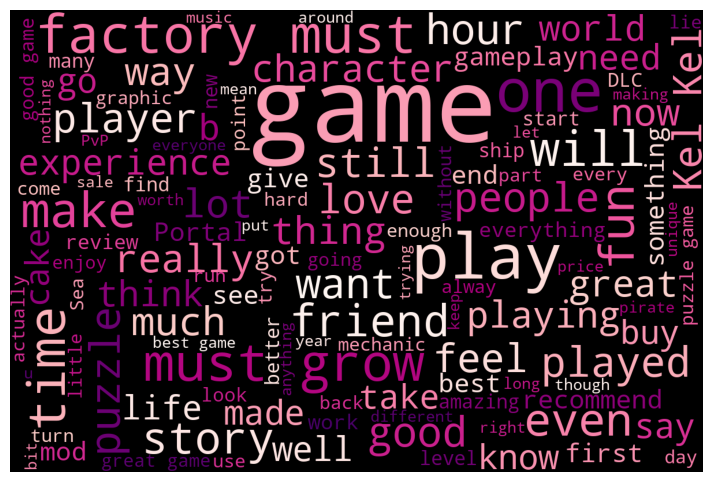

In [521]:
txt = ' '.join(i for i in df["review"])
wordcloud = WordCloud(max_font_size = 180,
                max_words = 120,
                width = 1200,
                height = 800,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

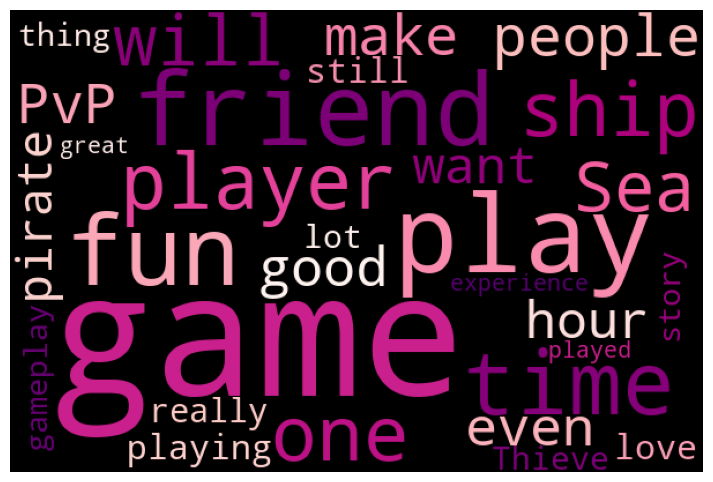

In [522]:
txt = ' '.join(i for i in df[df['genre'] == "A"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

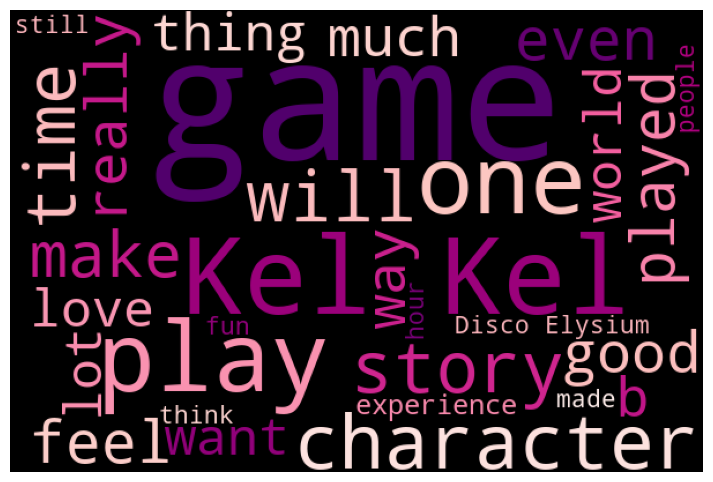

In [523]:
txt = ' '.join(i for i in df[df['genre'] == "R"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

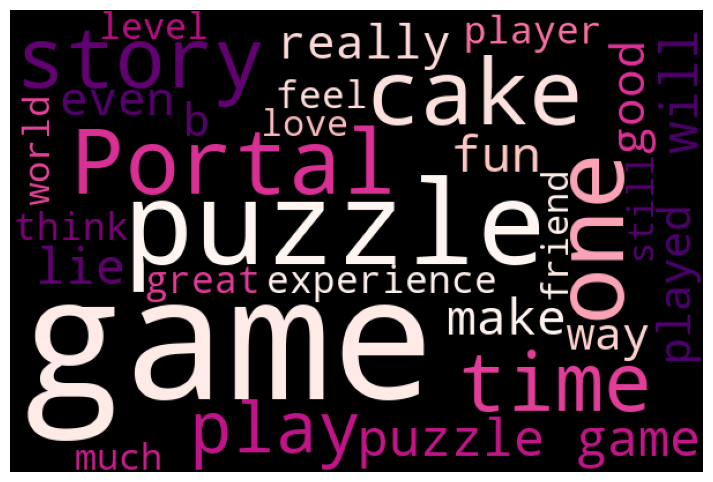

In [524]:
txt = ' '.join(i for i in df[df['genre'] == "P"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

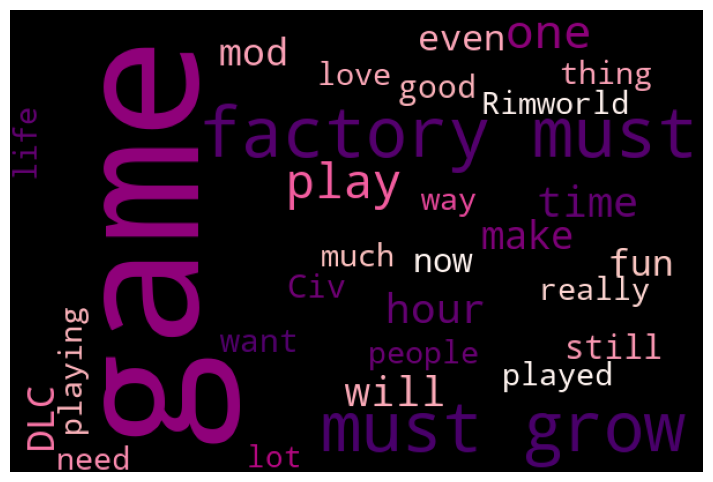

In [525]:
txt = ' '.join(i for i in df[df['genre'] == "S"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Usunięcie znaków, text lowering

In [526]:
df["review"] = df["review"].str.replace(r"\[.*?\]|\n|[^\x00-\x7F]+", "", regex=True).str.lower()

In [527]:
df["review"].sample(10)

29687    disco elysium took me 3 tries to get through. ...
6883     such an amazing addition to the rusty lake ser...
12922    from the little time i have played.  yeah, see...
21875    i can confirm it does start to get boring afte...
20819                crackhead cocaine has nothing on this
921      (tl;dr) just buy it and play it blind, but if ...
29126    "what is this, some sort of disco elysium?"-ha...
12673    it good game because it fun i make an army of ...
23792                          bang bap boom kapow blarggh
15082    after practicing with italy for a while i roll...
Name: review, dtype: object

#### Usunięcie znaków interpunkcyjnych i liczb

In [528]:
df["review"] = df["review"].str.replace(r"[0-9]", "", regex=True)

In [529]:
import string 
df["review"] = df["review"].str.replace('['  + string.punctuation + ']', "", regex =True)

In [530]:
df["review"].sample(5)

17057    i wish i was able to finish games but gamebrea...
25188    the only time i can have mortal kombat charact...
10994    would be great if it would actually launch ill...
22877               crazy how many things this game can be
13990                             its pretty chill i guess
Name: review, dtype: object

#### Tokenizacja

In [531]:
import nltk
df["tokenized"] = df["review"].apply(nltk.word_tokenize)

In [532]:
df["tokenized"].sample(15)

9901                                   [i, like, to, nuke]
12354    [thanks, for, the, ridiculous, price, increase...
13564    [ive, often, thought, if, i, had, to, bring, o...
9179     [great, game, play, in, a, dark, room, and, na...
17722                  [very, nice, if, you, have, nerves]
2218     [this, game, hurts, me, and, scares, me, and, ...
31226    [probably, the, best, puzzle, game, i, ever, p...
16411    [the, perfect, advanced, military, strategy, g...
5134     [accidentally, blew, up, the, sloop, and, get,...
24106    [dope, zombie, game, if, your, looking, for, a...
25090       [this, game, is, old, but, it, fucking, slams]
2796     [too, many, bugs, tell, tales, are, getting, s...
12222    [racially, motivated, to, create, new, genocid...
22738    [i, was, left, for, dead, overall, great, game...
27641    [this, is, a, timeless, classic, you, are, not...
Name: tokenized, dtype: object

#### Stopwords

In [693]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words('english')
english_stopwords_cleaned = [word.replace("'", "") for word in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [707]:
new_column = []
for row in df["tokenized"]:
    new_row = [word for word in row if word[0] not in english_stopwords_cleaned]
    new_column.append(new_row)
df["final_review"] = new_column

## Dependency parser test

In [900]:
test = [df["final_review"][6543],
       df["final_review"][4534],
       df["final_review"][12345],
       df["final_review"][12354]]

In [901]:
import stanza
nlp = stanza.Pipeline('en', tokenize_pretokenized=True) 
doc = nlp(test)

2024-03-18 21:13:55 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-03-18 21:13:55 INFO: Downloaded file to C:\Users\marty\stanza_resources\resources.json
2024-03-18 21:13:56 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-03-18 21:13:56 INFO: Using device: cpu
2024-03-18 21:13:56 INFO: Loading: tokenize
2024-03-18 21:13:56 INFO: Loading: mwt
2024-03-18 21:13:56 INFO: Loading: pos
2024-03-18 21:13:56 INFO: Loading: lemma
2024-03-18 21:13:56 INFO: Loading: constituency
2024-03-18 21:13:56 INFO: Loading: depparse
2024-03-18 21:13:57 INFO: Loading: sentiment
2024-03-18 21:13:57 INFO: Loading: ner

In [915]:
dependency_list = []
for dependency in doc.sentences[1].dependencies:
    dependency_list.append([dependency[2].text, dependency[0].id, dependency[1]])
    
for i in range(0, len(dependency_list)):
    if (int(dependency_list[i][1]) != 0):
        dependency_list[i][1] = test[1][(int(dependency_list[i][1]) - 1)]

print(dependency_list)

[['game', 'excellent', 'compound'], ['excellent', 'has', 'nsubj'], ['has', 0, 'root'], ['lot', 'has', 'obj'], ['possible', 'has', 'xcomp'], ['because', 'buy', 'mark'], ['graphics', 'buy', 'nsubj'], ['for', 'gameplay', 'case'], ['beautiful', 'gameplay', 'amod'], ['gameplay', 'graphics', 'nmod'], ['beautiful', 'graphics', 'amod'], ['everyone', 'game', 'nsubj'], ['can', 'bought', 'aux'], ['problem', 'bought', 'compound'], ['bought', 'game', 'amod'], ['game', 'beautiful', 'ccomp'], ['for', 'game', 'case'], ['had', 'buy', 'aux'], ['buy', 'has', 'advcl'], ['lower', 'price', 'amod'], ['price', 'buy', 'obj'], ['why', 'praised', 'advmod'], ['reviewers', 'praised', 'nsubj'], ['praised', 'price', 'acl:relcl'], ['for', 'having', 'mark'], ['not', 'having', 'advmod'], ['having', 'praised', 'advcl'], ['but', 'betrayed', 'cc'], ['boom', 'betrayed', 'nsubj'], ['betrayed', 'praised', 'conj'], ['everyone', 'betrayed', 'iobj'], ['no', 'gays', 'det'], ['gays', 'betrayed', 'obj']]


In [916]:
for dependency in doc.sentences[1].dependencies:
    if (dependency[2].xpos == "NN" or dependency[2].xpos == "NNS" or dependency[2].xpos == "NN" or dependency[2].xpos == "JJ"
        or dependency[2].xpos == "JJS" or dependency[2].xpos == "JJR") and (dependency[1] == "amod"):
        print(dependency[2].text, dependency[0].text) 

beautiful gameplay
beautiful graphics
lower price


# Jeśli 'advmod' występuje przed 'JJS' or 'JJ' to wskazuje na negacje i sentyment będzie odwrócony!!!!

In [917]:
df

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color,temp_review_len,tokenized,tagged,final_review
0,Omori,R,76561198106031324,384,stop scrolling dont look up anything about th...,0.969249725341796875,True,228,1709,21,2023-08-08 05:06:07,palevioletred,52,"[stop, scrolling, dont, look, up, anything, ab...","[(stop, VB), (scrolling, VBG), (dont, JJ), (lo...","[look, up, gamego, blind, bring, friend, game,..."
1,Omori,R,76561199245779291,352,i hate this game so much it ruined my life,0.952714741230010986,True,0,7812,6,2023-02-24 20:36:41,palevioletred,10,"[i, hate, this, game, so, much, it, ruined, my...","[(i, JJ), (hate, VBP), (this, DT), (game, NN),...","[hate, game, ruined, life]"
2,Omori,R,76561198324339583,430,no nekked womanno drugsno guns straight depre...,0.950879454612731934,True,88,308,3,2023-03-22 07:12:47,palevioletred,11,"[no, nekked, womanno, drugsno, guns, straight,...","[(no, DT), (nekked, JJ), (womanno, NN), (drugs...","[no, nekked, womanno, guns]"
4,Omori,R,76561198069660506,273,pros you can pet dogs and feed catscons trauma,0.941893279552459717,True,0,1566,25,2023-02-12 02:50:49,palevioletred,9,"[pros, you, can, pet, dogs, and, feed, catscon...","[(pros, NNS), (you, PRP), (can, MD), (pet, VB)...","[pros, can, pet, feed, catscons]"
5,Omori,R,76561199379292649,437,undertale but for mentally ill peopleedit coun...,0.940753281116485596,True,0,11243,1,2023-05-15 16:50:21,palevioletred,15,"[undertale, but, for, mentally, ill, peopleedi...","[(undertale, JJ), (but, CC), (for, IN), (menta...","[undertale, but, for, peopleedit, counter, cof..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32066,Little Nightmares II,P,76561198059115958,2,improved the same mechanics from the first gam...,0.54703831672668457,True,1288,565,176,2024-03-03 21:37:42,thistle,33,"[improved, the, same, mechanics, from, the, fi...","[(improved, VBN), (the, DT), (same, JJ), (mech...","[from, first, game, enemies, were, just, creep..."
32067,Little Nightmares II,P,76561199364306170,2,all those details and graphic motion and every...,0.545454561710357666,True,199,312,36,2024-02-18 21:01:37,thistle,46,"[all, those, details, and, graphic, motion, an...","[(all, DT), (those, DT), (details, NNS), (and,...","[graphic, everything, reason, get, game, glitc..."
32069,Little Nightmares II,P,76561199122879487,3,its actually so fun lmaoi used to watch like d...,0.545454561710357666,True,0,715,2,2023-12-27 19:39:38,thistle,27,"[its, actually, so, fun, lmaoi, used, to, watc...","[(its, PRP$), (actually, RB), (so, RB), (fun, ...","[fun, lmaoi, used, watch, like, coryxkenshin, ..."
32070,Little Nightmares II,P,76561198289739541,3,spoilersi dont usually write in general and es...,0.545229077339172363,False,0,379,2,2023-12-30 22:16:27,thistle,150,"[spoilersi, dont, usually, write, in, general,...","[(spoilersi, NNS), (dont, VBP), (usually, RB),...","[usually, write, general, especially, negative..."


#### POS tagging

#### Lemmatizer